# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [7]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target,columns=["price"])

## Perform a train-test-split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


## Apply your model to the train set

#### Importing and initializing the model class

In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


#### Fitting the model to the train data

In [11]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Calculating predictions on the train set, and on the test set

In [12]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#### Calculating your residuals

In [14]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
print(train_residuals)
print(test_residuals)

         price
150  -0.529655
111   2.394819
260  -5.926487
242  -2.033647
251   8.079142
180  -8.342698
72    5.315152
129   2.070896
448   3.635339
409 -10.009838
357   2.700482
176  -0.780766
168  -1.168952
164  -1.251320
319  -1.140583
346  -0.163466
432   3.613039
323   0.561507
390   2.305709
139   0.467103
426   4.315641
252   4.573985
342   7.574012
52    4.281819
283  -7.596081
38   -2.673859
485   1.203345
122  -3.286113
70    2.694017
41    4.747902
..         ...
502   4.540736
258  -5.263102
282  -3.745122
270  -2.583766
32   -4.205270
11   -1.001980
64   -7.504295
84   -0.622355
87    2.382620
348   3.133595
21   -1.135112
83    2.056844
73    1.648959
160   7.013119
413  -3.802785
240   0.075916
343   3.004512
126  -3.862450
254   2.924058
134  -0.194843
415   2.526805
9    -4.082091
373  -5.192656
422  -2.628140
405   9.782340
3     4.056002
267 -16.596580
147  -4.786611
327  -3.298653
493  -1.060095

[379 rows x 1 columns]
         price
336   1.807835
114   5.428853
1

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [15]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)

Train MSE: 23.76722623926989
Test MSE: 15.878784718786534


If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

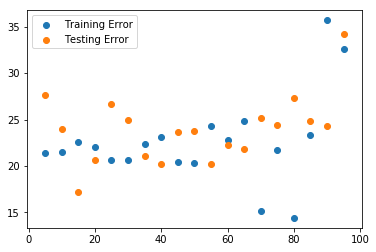

In [16]:
import random
random.seed(47)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

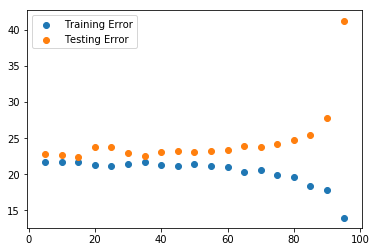

In [17]:
random.seed(47)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

What's happening here? evaluate your result!

In [ ]:
# Choosing a test size between 5 and 60 will minimize the difference in MSE of the test and train sets

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.